1. Набор $(s_0,a_0,s_1,a_1,s_2,a_2,...)$ наз. траекторией
2. Для данной среды, политики $\pi$ и нач. сост. $s_0\in S$ распределение, из кот. приходят траектории $\tau$, наз. распределением траекторий:
$$p(\tau)=p(s_0,a_0,s_1,a_1,s_2,a_2,...)=\prod_{t\geq0}\pi(a_t|s_t)p(s_{t+1}|s_t, a_t)$$
3. Мат. ож. по траекториям $\mathbb{E}_\tau(\cdot):=\mathbb{E}_{\pi(a_0|s_0)}\mathbb{E}_{\pi(s_1|s_0, a_0)}\mathbb{E}_{\pi(a_1, s_1)}...(\cdot)$

# Policy Gradient подход

__Замечание__:  
$$\nabla_\theta\log q(x|\theta)=\frac{\nabla_\theta q(x|\theta)}{q(x|\theta)}$$
Сосред. на методах, кот. непосредственно опр. политику агента.

Важное достоинство таких методов: они применимы также к непрер. действиям.

Предп., что состояние среды описывается вектором n вещ. чисел, а действия дискретны

Будем аппр. функцию политики $\pi_\theta(a|s)$ нейронной сетью.
- с параметрами $\theta$
- с n входами
- m выходами, на кот. находятся вероятности каждого из m действий

Для обучения сети необх. обучающие данные $s^k,\pi^k$, k=1...N, где $s^k$ - n-мерный вектор для k-ого примера, а $\pi^k=(p_1,..,p_m)^k$ - нормированный на 1 неотр. m-мерный вектор.

Возьмём нач. ф-ию $\pi_\theta(a|s)$ со случ. иниц-ыми параметрами. С тек. функцией политики проведём M эпизодов, вычисляя в каждом получаемое суммарное вознашраждение R. На основе этой информации сформируем обуч. данные в виде троек $(s_t, a_t, R)$, где в данном эпизоде во всех тройках одинаковый R.

Каждую тройку $(s, a, R)$ из нескольких эпизодов будем нумеровать индексом k. При обучении минимизируется сумма:
$$L=-\sum_iR^k\log p^k, p^k=\pi_\theta(a^k|s^k)$$
где $p^k$ вероятность действия $a^k$. Таким образом, при прямом распространении на вход сети подаётся пример $s^k$, на выходе получается распределение выроятностей $(p_1,...,p_m)^k$. Из этих вероятностей выбирается та, которая соотв. сделанному в примере действию $a^k$.

Т.к. $\log p$

Будем считать, что награда на каждом шаге зависит от текущего состояния среды $r_t=r(s_t)$. Макс. сумм. награда в течении эпизода (T - время попадания в терминальное состояние):
$$R(\tau)=r_1+r_2+r_3+...+r_T$$
Эта награда реализуется на кокр. траектории $\tau=(s_0,a_0,s_1,a_1,s_2,a_2,..,s_{T-1},a_{T-1},s_T)$ и зависит от политики агента $\pi_\theta(a|s)$ с параметрами $\theta$. Вероятность траектории определяется распределением нач. состояния $p(s_0)$, усл. вероятностями политики $\pi_\theta(a|s)$ и моделью среды $p(s'|s,a)$:
$$p_\theta(\tau)=p(s_0)\prod^{T-1}_{t=0}\pi_\theta(a_t|s_t)p(s_{t+1}|s_t,a_t)$$
Уравнение по всем траекториям имеет вид:
$$R=\mathbb{E}_{r\sim p_\theta(\tau)}R(\tau)=\sum_\tau p_\theta(\tau)\cdot R(\tau)$$
где сумма по r - сумма по всем $\tau=(s_0,a_0,s_1,a_1,s_2,a_2,..,s_{T-1},a_{T-1},s_T)$. Чтобымакс. это выражение при помощи градиентного метода необходимо вычислить градиент $\nabla_\theta R$ по параметрам $\theta$ модели политики $\pi_\theta(s,a)$. Запишем логарифм вероятности траектории и возьмем его градиент:
$$\log p_\theta(\tau)=\sum^{T-1}_{t=0}\log\pi_\theta(a_t|s_t)+[не~зависит~от~\theta]\Rightarrow\nabla_\theta p_\theta(\tau)=p_\theta(\tau)\sum^{T-1}_{t=0}\nabla\log \pi_\theta(a_t,s_t)$$

Таким образом:
$$\nabla_\theta R=\sum_\tau p_\theta(\tau)R(\tau)\sum^P{T-1}_{t=0}\nabla\log\pi_\theta(a_t,s_t)$$
Если модель среды $p(s'|s,a)$ неизвестна, градиент оценивается по методу Монте-Карло:
$$\nabla_\theta R=\frac{1}{N}\sum^N_{k=1}\sum^{T_k-1}_{t=0}R^k\nabla\log\pi_\theta(a^k_t,s^k_t)$$
где $R^k$ - награда, полученная в k-м эпизоде, а a^k_t,s^k_t - значения состояния и действия, полученные в k-м эпизоде на временном шаге t. Проблемы такой оценки связаны с:
- количество возм. траекторий огромно, поэтому требуется очень много выборочных траекторий для оценки целевой функции. Это приводит к высокой дисперсии в оценке градиента.
- для стабильности обучения в веса политики можно вносить только небольшие изменения на каждой итерации.

# REINFORCE

__Среда CartPole__

Состояние:
- положение тележки: [-2.4, 2.4], эпизод завершается при выходе за пределы
- скорость тележки
- угол наклона; если выходит из [-0.209, 0.209], то эпизод завершается
- скорость верхнего стержня

In [67]:
from pyvirtualdisplay import Display
from typing import *
import torch
import gym
import matplotlib.pyplot as plt

In [5]:
env = gym.make("CartPole-v0", render_mode="rgb_array")

/home/andrew/Projects/2023_1/machine_learning/lib/python3.10/site-packages/gym/envs/registration.py:555: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(


In [3]:
env.reset()

(array([ 0.01485905, -0.02204885,  0.01792712,  0.03240047], dtype=float32),
 {})

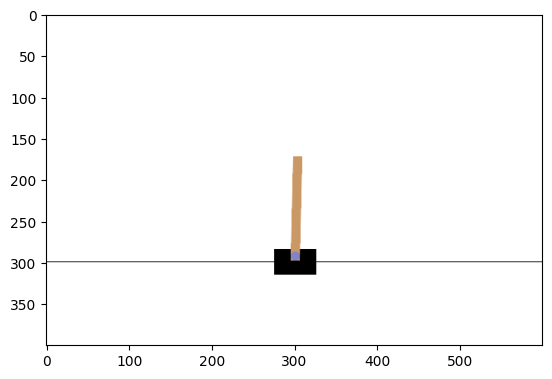

In [4]:
plt.imshow(env.render());

In [187]:
import torch
import torch.nn as nn
from typing import *
from typing_extensions import Self

In [188]:
class PolicyNetwork:
    def __init__(self, n_state: int, n_actions: int, n_hidden: int, lr: float = 0.005) -> None:
        self.model = nn.Sequential(
            nn.Linear(n_state, n_hidden),
            nn.ReLU(),
            nn.Linear(n_hidden, n_actions),
            nn.Softmax()
        )
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr)
    
    def predict(self, s) -> Any:
        # print(s)
        # print(self.model(torch.Tensor(s)))
        return self.model(torch.Tensor(s))
    
    def update(self, returns, log_probs) -> Self:
        policy_gradient = []
        for log_prob, Gt, in zip(log_probs, returns):
            policy_gradient.append(-log_prob * Gt)
        loss = torch.stack(policy_gradient).sum()
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
    
    def get_action(self, s) -> tuple:
        probs = self.predict(s)
        action = torch.multinomial(probs, 1).item()
        log_prob = torch.log(probs[action])
        return action, log_prob

In [189]:
def reinforce(env: gym.Env, estimator: PolicyNetwork, n_episodes: int, gamma: float = 1.0) -> Any:
    for episode in range(n_episodes):
        print(episode)
        log_probs = []
        rewards = []
        state = env.reset()[0]
        while True:
            action, log_prob = estimator.get_action(state)
            next_state, reward, is_done, is_truncated, _ = env.step(action)

            total_reward_episode[episode] += reward
            log_probs.append(log_prob)
            rewards.append(reward)

            if is_truncated or is_done:
                returns = []
                Gt = 0
                pw = 0

                for reward in rewards[::-1]:
                    Gt += gamma ** pw * reward
                    pw += 1
                    returns.append(Gt)
                
                returns = returns[::-1]
                returns_amount = len(returns)
                returns = torch.tensor(returns)
                returns = (returns - returns.mean()) / (returns.std() + 1e-9)
                returns.resize_(returns_amount, 1)

                estimator.update(returns, log_probs)
                print(episode, total_reward_episode[episode])
                break
        
        state = next_state

In [190]:
n_state = env.observation_space.shape[0]
n_action = env.action_space.n
n_hidden = 128
lr = .003
policy_net = PolicyNetwork(n_state, n_action, n_hidden, lr)

In [191]:
n_episodes = 1500
gamma = 0.9
total_reward_episode = [0] * n_episodes

In [192]:
reinforce(env, policy_net, n_episodes, gamma)

0
0 21.0
1
1 12.0
2
2 14.0
3
3 16.0
4
4 18.0
5
5 24.0
6
6 10.0
7
7 13.0
8
8 21.0
9
9 8.0
10
10 11.0
11
11 10.0
12
12 50.0
13
13 12.0
14
14 31.0
15
15 9.0
16
16 13.0
17
17 16.0
18
18 10.0
19
19 14.0
20
20 12.0
21
21 31.0
22
22 12.0
23
23 15.0
24


/home/andrew/Projects/2023_1/machine_learning/lib/python3.10/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


24 15.0
25
25 9.0
26
26 38.0
27
27 11.0
28
28 12.0
29
29 21.0
30
30 13.0
31
31 14.0
32
32 14.0
33
33 15.0
34
34 9.0
35
35 16.0
36
36 14.0
37
37 19.0
38
38 14.0
39
39 9.0
40
40 21.0
41
41 33.0
42
42 17.0
43
43 27.0
44
44 13.0
45
45 44.0
46
46 16.0
47
47 11.0
48
48 19.0
49
49 41.0
50
50 12.0
51
51 14.0
52
52 35.0
53
53 12.0
54
54 18.0
55
55 27.0
56
56 8.0
57
57 24.0
58
58 13.0
59
59 11.0
60
60 42.0
61
61 16.0
62
62 23.0
63
63 8.0
64
64 17.0
65
65 24.0
66
66 28.0
67
67 23.0
68
68 10.0
69
69 24.0
70
70 55.0
71
71 19.0
72
72 19.0
73
73 11.0
74
74 20.0
75
75 10.0
76
76 21.0
77
77 10.0
78
78 25.0
79
79 10.0
80
80 14.0
81
81 11.0
82
82 34.0
83
83 25.0
84
84 19.0
85
85 14.0
86
86 13.0
87
87 32.0
88
88 40.0
89
89 21.0
90
90 10.0
91
91 14.0
92
92 50.0
93
93 17.0
94
94 16.0
95
95 34.0
96
96 12.0
97
97 28.0
98
98 14.0
99
99 36.0
100
100 16.0
101
101 42.0
102
102 18.0
103
103 17.0
104
104 9.0
105
105 29.0
106
106 47.0
107
107 22.0
108
108 60.0
109
109 13.0
110
110 51.0
111
111 36.0
112
112 13.0
113


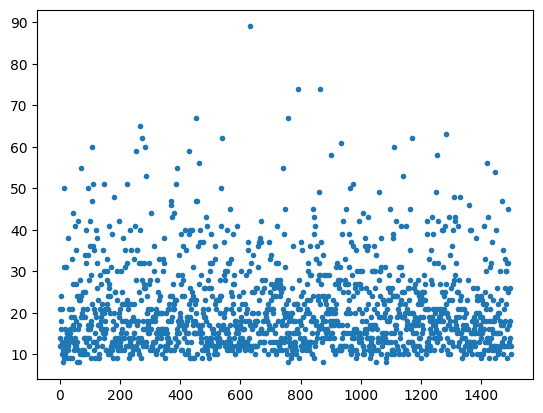

In [193]:
plt.plot(total_reward_episode, ".");


In [194]:
env.close()

In [237]:
class PolicyNetwork:
    def __init__(self, n_state: int, n_actions: int, n_hidden: int, lr: float = 0.005) -> None:
        self.model = nn.Sequential(
            nn.Linear(n_state, n_hidden),
            nn.ReLU(),
            nn.Linear(n_hidden, n_actions),
            nn.Softmax()
        )
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr)
    
    def predict(self, s) -> Any:
        # print(s)
        # print(self.model(torch.Tensor(s)))
        return self.model(torch.Tensor(s))
    
    def update(self, returns, log_probs) -> None:
        policy_gradient = []
        for log_prob, Gt, in zip(log_probs, returns):
            policy_gradient.append(-log_prob * Gt)
        loss = torch.stack(policy_gradient).sum()
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
    
    def get_action(self, s) -> tuple:
        probs = self.predict(s)
        action = torch.multinomial(probs, 1).item()
        log_prob = torch.log(probs[action])
        return action, log_prob

In [270]:
from torch.autograd import Variable

class ValueNetwork:
    def __init__(self, n_state: int, n_hidden: int = 50, lr: float = .05) -> None:
        self.criterion = nn.MSELoss()
        self.model = nn.Sequential(
            nn.Linear(n_state, n_hidden),
            nn.ReLU(),
            nn.Linear(n_hidden, 1)
        )
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr)
    
    def update(self, s, y) -> None:
        y_pred = self.model(torch.tensor(s))
        loss = self.criterion(y_pred, Variable(torch.Tensor(y)))
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
    
    def predict(self, s) -> Any:
        with torch.no_grad():
            return self.model(torch.Tensor(s))

In [271]:
def reinforce(env: gym.Env, estimator_policy: PolicyNetwork, estimator_value: ValueNetwork, n_episodes: int, gamma: float = 1.0) -> Any:
    for episode in range(n_episodes):
        log_probs = []
        states = []
        rewards = []
        state = env.reset()[0]
        while True:
            states.append(state)
            action, log_prob = estimator_policy.get_action(state)
            next_state, reward, is_done, is_truncated, _ = env.step(action)

            total_reward_episode[episode] += reward
            log_probs.append(log_prob)
            rewards.append(reward)

            if is_truncated or is_done:
                returns = []
                Gt = 0
                pw = 0

                for reward in rewards[::-1]:
                    Gt += gamma ** pw * reward
                    pw += 1
                    returns.append(Gt)
                
                returns = returns[::-1]
                returns_amount = len(returns)

                returns = torch.tensor(returns)
                baseline_values = estimator_value.predict(states)
                advantages = returns - baseline_values
                returns.resize_(returns_amount, 1)

                estimator_value.update(states, returns)
                estimator_policy.update(advantages, log_probs)

                # print(episode, total_reward_episode[episode])
                break
        
        state = next_state

In [272]:
n_state = env.observation_space.shape[0]
n_action = env.action_space.n
n_hidden = 10
lr = .001
policy_net = PolicyNetwork(n_state, n_action, n_hidden, lr)
value_net = ValueNetwork(n_state, n_hidden, lr)

In [273]:
n_episodes = 1000
gamma = 0.9
total_reward_episode = [0] * n_episodes

In [274]:
reinforce(env, policy_net, value_net, n_episodes, gamma)

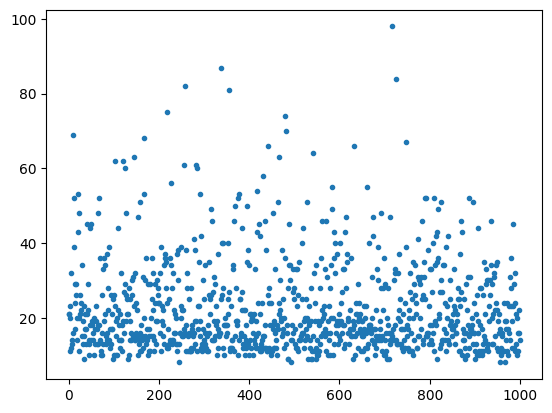

In [275]:
plt.plot(total_reward_episode, ".")


# Реализация алгоритма Исполнитель-Критик

- Исполнитель. Принимает входное состояние и выводит вероятности действий, обучает оптимальную стратегию, обновляя модель с помощью инф., пред. критиком;
- Критик. Оценивает, гаколько хорошо оказаться во входном состоянии, вычисляя функции ценности. Ценность состояния подск. исполнителю, что он должен подправить.

У этих компонентов общие входной и скрытый слой. Функция потерь представляет собой сумму 2-х слагаемых:
- отрицательного лог. правдоподобия действия, которое оценивает качество исполнителя;
- среднеквадратической ошибки сежду оценкой и вычислительным значением дохода

Более...**

In [212]:
env = gym.make("CartPole-v0", render_mode="rgb_array")

/home/andrew/Projects/2023_1/machine_learning/lib/python3.10/site-packages/gym/envs/registration.py:555: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(


In [213]:
import torch.nn.functional as F

sdfsdf

In [214]:
class ActorCriticModel(nn.Module):
    def __init__(self, n_input: int, n_output: int, n_hidden: int) -> None:
        super(ActorCriticModel, self).__init__()
        self.fc = nn.Linear(n_input, n_hidden)
        self.action = nn.Linear(n_hidden, n_output)
        self.value = nn.Linear(n_hidden, 1)
    
    def forward(self, x: int) -> tuple[torch.Tensor, torch.Tensor]:
        x = torch.Tensor(x)
        x = F.relu(self.fc(x))
        action_probs = F.softmax(self.action(x), dim=-1)
        state_value = self.value(x)
        return action_probs, state_value

Через интерфейс torch.optim.lr...

In [215]:
class PolicyNetwork:
    def __init__(self, n_state: int, n_actions: int, n_hidden: int, lr: float = 0.001) -> None:
        self.model = ActorCriticModel(n_state, n_action, n_hidden)
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr)
        self.scheduler = torch.optim.lr_scheduler.StepLR(self.optimizer, step_size=10, gamma=0.9)
    
    def predict(self, s: Any) -> Any:
        return self.model(torch.tensor(s))
    
    def update(self, returns, log_probs, state_values) -> None:
        loss = 0
        for log_prob, value, Gt in zip(log_probs, state_values, returns):
            advantage = Gt - value.item()
            policy_loss = -log_prob * advantage
            value_loss = F.smooth_l1_loss(value, Gt)
            loss += policy_loss + value_loss
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
    
    def get_action(self, s) -> tuple:
        action_probs, state_value = self.predict(s)
        action = torch.multinomial(action_probs, 1).item()
        log_prob = torch.log(action_probs[action])
        return action, log_prob, state_value

In [226]:
def actor_critic(env: gym.Env, estimator: PolicyNetwork, n_episode: int, gamma: float = 1.0) -> None:
    for episode in range(n_episode):
        # print(episode, flush=True)
        log_probs = []
        rewards = []
        state_values = []

        state = env.reset()[0]
        while True:
            action, log_prob, state_value = estimator.get_action(state)
            next_state, reward, is_done, is_truncated, _ = env.step(action)
            total_reward_episode[episode] += reward
            log_probs.append(log_prob)
            state_values.append(state_value)
            rewards.append(reward)

            if is_truncated or is_done:
                returns = []
                Gt = 0
                pw = 0
                for reward in rewards[::-1]:
                    Gt += gamma ** pw * reward
                    returns.append(Gt)
                    pw += 1
                returns = returns[::-1]
                returns_amount = len(returns)
                returns = torch.tensor(returns)
                returns = (returns - returns.mean()) / (returns.std() + 1e-9)
                returns.resize_(returns_amount, 1)
                estimator.update(returns, log_probs, state_values)
                if total_reward_episode[episode] >= 195:
                    estimator.scheduler.step()
                break

            state = next_state

In [227]:
n_state = env.observation_space.shape[0]
n_action = env.action_space.n
n_hidden = 500
lr = 0.001
policy_net = PolicyNetwork(n_state, n_action, n_hidden, lr)

In [228]:
n_episodes = 500
gamma = .9
total_reward_episode = [0] * n_episodes

In [229]:
actor_critic(env, policy_net, n_episodes, gamma)

(0.0, 210.0)

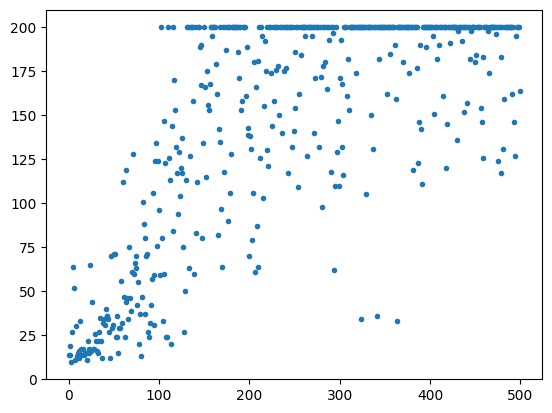

In [230]:
plt.plot(total_reward_episode, ".")
plt.ylim(bottom=0, top=210)

In [276]:
env.close()

In [277]:
class ActorCriticModel(nn.Module):
    def __init__(self, n_input: int, n_output: int, n_hidden: List[int]) -> None:
        super(ActorCriticModel, self).__init__()
        self.fc1 = nn.Linear(n_input, n_hidden[0])
        self.fc2 = nn.Linear(n_hidden[0], n_hidden[1])
        self.action = nn.Linear(n_hidden[1], n_output)
        self.value = nn.Linear(n_hidden[1], 1)
    
    def forward(self, x: int) -> tuple[torch.Tensor, torch.Tensor]:
        x = torch.Tensor(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        action_probs = F.softmax(self.action(x), dim=-1)
        state_value = self.value(x)
        return action_probs, state_value

In [278]:
class PolicyNetwork:
    def __init__(self, n_state: int, n_actions: int, n_hidden: int, lr: float = 0.001) -> None:
        self.model = ActorCriticModel(n_state, n_action, n_hidden)
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr)
        self.scheduler = torch.optim.lr_scheduler.StepLR(self.optimizer, step_size=10, gamma=0.9)
    
    def predict(self, s: Any) -> Any:
        return self.model(torch.tensor(s))
    
    def update(self, returns, log_probs, state_values) -> None:
        loss = 0
        for log_prob, value, Gt in zip(log_probs, state_values, returns):
            advantage = Gt - value.item()
            policy_loss = -log_prob * advantage
            value_loss = F.smooth_l1_loss(value, Gt)
            loss += policy_loss + value_loss
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
    
    def get_action(self, s) -> tuple:
        action_probs, state_value = self.predict(s)
        action = torch.multinomial(action_probs, 1).item()
        log_prob = torch.log(action_probs[action])
        return action, log_prob, state_value

In [283]:
def actor_critic(env: gym.Env, estimator: PolicyNetwork, n_episode: int, gamma: float = 1.0) -> None:
    for episode in range(n_episode):
        print(episode, flush=True)
        log_probs = []
        rewards = []
        state_values = []

        state = env.reset()[0]
        print(state)
        while True:
            #one_hot_state = [0] * 48
            #one_hot_state[state] = 1
            action, log_prob, state_value = estimator.get_action(state)
            next_state, reward, is_done, is_truncated, _ = env.step(action)
            total_reward_episode[episode] += reward
            log_probs.append(log_prob)
            state_values.append(state_value)
            rewards.append(reward)

            if is_truncated or is_done:
                returns = []
                Gt = 0
                pw = 0
                for reward in rewards[::-1]:
                    Gt += gamma ** pw * reward
                    returns.append(Gt)
                    pw += 1
                returns = returns[::-1]
                returns_amount = len(returns)
                returns = torch.tensor(returns)
                returns = (returns - returns.mean()) / (returns.std() + 1e-9)
                returns.resize_(returns_amount, 1)
                estimator.update(returns, log_probs, state_values)
                if total_reward_episode[episode] >= 195:
                    estimator.scheduler.step()
                break

            state = next_state

In [284]:
n_state = env.observation_space.shape[0]
n_action = env.action_space.n
n_hidden = [128, 32]
lr = 0.03
policy_net = PolicyNetwork(n_state, n_action, n_hidden, lr)

In [285]:
n_episodes = 1000
gamma = .9
total_reward_episode = [0] * n_episodes

In [286]:
actor_critic(env, policy_net, n_episodes, gamma)

0
[-0.03487453 -0.04806196  0.01079055  0.01742156]
1
[ 0.01724971 -0.02329541  0.01880908 -0.03699289]
2
[-0.04760713  0.03760571  0.04657308 -0.00526537]
3
[-0.03959657 -0.00802913 -0.00482084  0.02542618]
4
[-0.00118667  0.01507041 -0.00982424 -0.02283761]
5
[ 0.0163789  -0.0235983   0.01705728 -0.02799546]
6
[-0.02058108 -0.01579745 -0.02093358 -0.02556765]
7
[-0.02063084  0.02522938  0.01794985  0.04617077]
8
[ 0.01933037  0.04035328 -0.01656599  0.03749208]
9
[-0.01618131  0.02682563  0.03318634 -0.0377665 ]
10
[ 0.00154531 -0.0149806   0.01057278 -0.00377534]
11
[ 0.02182637  0.03651378 -0.04852537  0.04999853]
12
[0.01068158 0.03434812 0.00333621 0.04903436]
13
[-0.01120618 -0.00081446 -0.04852055  0.01839184]
14
[ 0.02385627 -0.01801232 -0.03221745  0.02966714]
15
[-0.04233058  0.00767819  0.033819    0.00918546]
16
[-0.01427412 -0.02693418 -0.01284587  0.02814516]
17
[-0.01887124 -0.04294876  0.02958992 -0.04707367]
18
[-0.0418091   0.03277345  0.01968208  0.00243589]
19
[ 0.

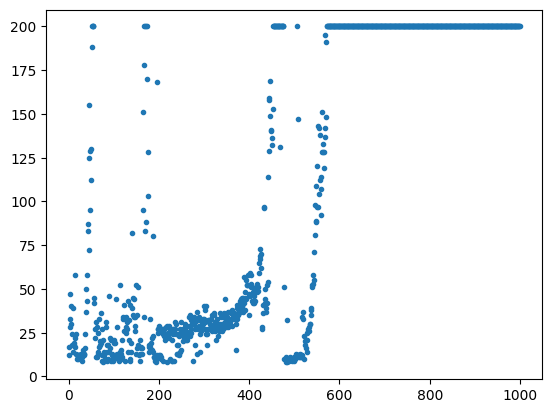

In [287]:
plt.plot(total_reward_episode, ".")
# plt.ylim(bottom=0, top=210)

# Метод перекрестной энтропии для CartPole

In [178]:
import gym
import torch
import torch.nn as nn
from typing import *
import matplotlib.pyplot as plt

In [179]:
env = gym.make("CartPole-v0", render_mode="rgb_array")

/home/andrew/Projects/2023_1/machine_learning/lib/python3.10/site-packages/gym/envs/registration.py:555: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(


In [180]:
class Estimator:
    def __init__(self, n_state: int, lr: float = 0.001) -> None:
        self.model = nn.Sequential(
            nn.Linear(n_state, 1),
            nn.Sigmoid()
        )
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr)
        self.criterion = nn.BCELoss()
    
    def predict(self, state: list) -> torch.Tensor:
        return self.model(torch.Tensor(state))

    def update(self, state: list, y: list) -> None:
        y_pred = self.predict(state)
        # print(torch.Tensor(y).shape, y_pred.shape)
        loss = self.criterion(y_pred.squeeze(), torch.Tensor(y))
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

In [181]:
def cross_entropy(env: gym.Env, estimator: Estimator, n_episodes: int, n_samples: int) -> None:
    data = []
    for episode in range(n_episodes):
        rewards = 0
        actions = []
        states = []

        state = env.reset()[0]
        while True:
            action = env.action_space.sample()
            next_state, reward, is_done, is_truncated, _ = env.step(action)
            # print(env.__dict__["_elapsed_steps"])
            actions.append(action)
            states.append(state)
            rewards += reward

            if is_truncated or is_done:
                for state, action in zip(states, actions):
                    data.append((rewards, state, action))
                break
            state = next_state
    
    data.sort(key=lambda value: value[0], reverse=True) # reward
    samples = data[:n_samples]
    train_data_states = [item[1] for item in samples]
    train_data_actions = [item[2] for item in samples]

    for _ in range(100):
        estimator.update(train_data_states, train_data_actions)

In [182]:
n_states = env.observation_space.shape[0]
estimator = Estimator(n_states, 0.1)

In [183]:
n_episodes = 1000
n_samples = 1000

In [184]:
cross_entropy(env, estimator, n_episodes, n_samples)

In [185]:
total_reward_episode = [0] * n_episodes
for episode in range(n_episodes):
    state = env.reset()[0]
    while True:
        action = 1 if estimator.predict(state) >= .5 else 0
        next_state, reward, is_done, is_truncated, _ = env.step(action)
        # print(env.__dict__["_elapsed_steps"], tr, info)
        total_reward_episode[episode] += 1
        if is_truncated or is_done:
            break
        state = next_state

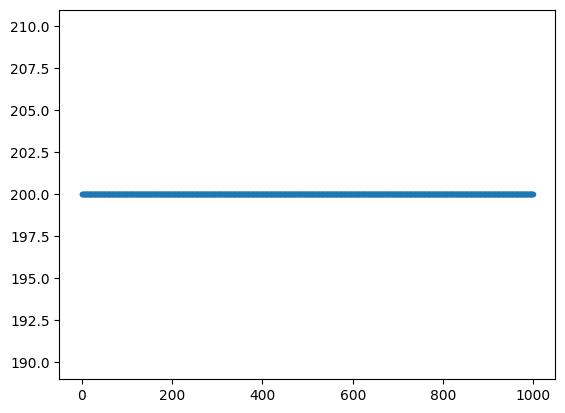

In [186]:
plt.plot(total_reward_episode, ".")

# Непрерывная окружающая среда

Пусть $\exists$ m-компонентный вектор действия с вещю элементами. Будем считать, что вероятность m компоненты описывается нормальным распределением. ТОгда политика:
$$\pi(a|s)=\prod^m_{k=1}\frac{1}{\sqrt{2\pi D_k}}e^{-\frac{(a_k-\mu_k)^2}{2D_k}}$$

Будем учить сеть получать средние значения $\mu_k$ и дисперсии $D_k-\sigma^2_k$. Соответственно логарифм ф-ии политики:
$$\log\pi(a|s)=-\sum^m_{k=1}\left[\frac{(a_k-\mu_k)^2}{2D_k}+\log\sqrt{2\pi D_k}\right]\cdot$$

![](./1709544769583.webp)

Continuous Mountain Car - среда с непрерывными действиями, прин. знач. от -1 до 1. Цель - доехать на машине до вершины горы, расп. справа.

Действие предст. числом с пл. точкой

- Дисперсии $D_k > 0 \Rightarrow$ на выходе Softplus $...$
- ...
- ...

In [1]:
import gym
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [11]:
from typing import *
from typing_extensions import Self

In [2]:
env = gym.make("MountainCarContinuous-v0", render_mode="rgb_array")

In [4]:
env.observation_space.shape

(2,)

In [5]:
env.action_space.shape

(1,)

In [8]:
env.action_space.low[0], env.action_space.high[0]

(-1.0, 1.0)

In [9]:
env.reset()

(array([-0.48099074,  0.        ], dtype=float32), {})

In [10]:
env.step(env.action_space.sample())

(array([-0.48164323, -0.00065252], dtype=float32),
 -0.004952848470365923,
 False,
 False,
 {})

In [33]:
class ActorCriticModel(nn.Module):
    def __init__(self, n_input: int, n_output: int, n_hidden: int) -> None:
        super(ActorCriticModel, self).__init__()
        self.fc = nn.Linear(n_input, n_hidden)
        self.mu = nn.Linear(n_hidden, n_output)
        self.sigma = nn.Linear(n_hidden, n_output)
        self.value = nn.Linear(n_hidden, 1)
    
    def forward(self, x: torch.Tensor) -> tuple[torch.Tensor, torch.Tensor, torch.Tensor]:
        x = F.relu(self.fc(x))
        mu = F.tanh(self.mu(x))
        sigma = F.softplus(self.sigma(x))
        value = self.value(x)
        return mu, sigma, value

In [39]:
class PolicyNetwork:
    def __init__(self, n_state: int, n_action: int, n_hidden: int, lr: float = 0.001) -> None:
        self.model = ActorCriticModel(n_state, n_action, n_hidden)
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr)
    
    def predict(self, s: list) -> torch.Tensor:
        return self.model(torch.Tensor(s))
    
    def update(self, returns, log_probs, state_values) -> None:
        loss = 0
        for log_prob, value, Gt in zip(log_probs, state_values, returns):
            advantage = Gt - value.item()
            policy_loss = -log_prob * advantage
            value_loss = F.smooth_l1_loss(value, Gt)
            loss += policy_loss + value_loss
            
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

    def get_action(self, s: list) -> tuple[torch.Tensor, Any, torch.Tensor]:
        mu, sigma, value = self.predict(s)
        dist = torch.distributions.Normal(mu, sigma)
        action = dist.sample()
        log_prob = dist.log_prob(action)
        return action, log_prob, value

In [297]:
def actor_critic(env: gym.Env, estimator: PolicyNetwork, n_episodes: int, gamma=1.) -> None:
    global episode_length
    for episode in range(n_episodes):
        values = []
        log_probs = []
        rewards = []
        state = env.reset()[0]

        while True:
            action, log_prob, value = estimator.get_action(state)
            action = action.clip(env.action_space.low[0], env.action_space.high[0])
            next_state, reward, is_done, is_truncated, _ = env.step(action)
            values.append(value)
            log_probs.append(log_prob)
            rewards.append(reward)
            total_reward_episode[episode] += reward
            episode_length[episode] += 1

            if is_truncated or is_done:
                Gt = 0
                pw = 0
                returns = []

                for reward in rewards[::-1]:
                    Gt += gamma**pw * reward
                    returns.append(Gt)
                    pw += 1
                
                returns = returns[::-1]
                returns_amount = len(returns)
                returns = torch.tensor(returns)
                returns = (returns - returns.mean()) / (returns.std() + 1e-9)
                returns.resize_(returns_amount, 1)
                estimator.update(returns, log_probs, values)
                print(f"Episode: {episode} Total reward: {total_reward_episode[episode]} Episode length: {episode_length[episode]}")
                break

            state = next_state

In [312]:
n_state = env.observation_space.shape[0]
n_action = env.action_space.shape[0]
n_hidden = 128
lr = 0.001
policy_net = PolicyNetwork(n_state, n_action, n_hidden, lr)

In [348]:
n_episodes = 2000
total_reward_episode = [0] * n_episodes
episode_length = [0] * n_episodes
gamma = 0.9

In [ ]:
actor_critic(env, policy_net, n_episodes, gamma)

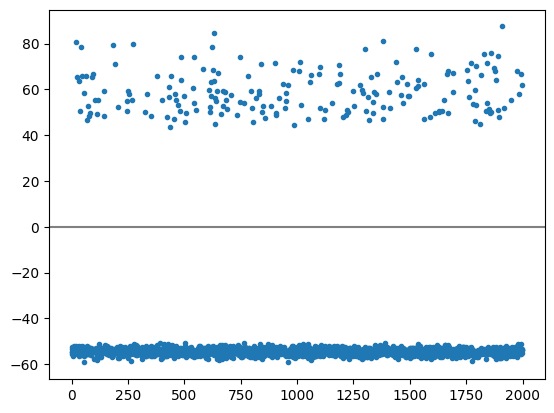

In [350]:
plt.plot(total_reward_episode, ".")
plt.axhline(0, color="gray")